### Import Libraries

In [1]:
import pickle
import os
import pandas as pd
import enum
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from spear.labeling import PreLabels
import numpy as np
from spear.cage import Cage
from utils import custom_dataset, train_all_LF, random_seed, custom_random_seeds
from generate_LF import get_variables
from spear.labeling import labeling_function, ABSTAIN, preprocessor, continuous_scorer
from cnn import create_cnn
from keras.utils import np_utils
from spear.labeling import labeling_function, ABSTAIN, preprocessor, continuous_scorer
import re
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split


c:\Users\adity\Documents\GitHub\MICCAI\med\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1/25
1/1 [==============================] - 3s 3s/step - loss: 1.0823 - accuracy: 0.3500 - val_loss: 1.1402 - val_accuracy: 0.0000e+00
Epoch 2/25
1/1 [==============================] - 0s 224ms/step - loss: 1.0457 - accuracy: 0.4750 - val_loss: 1.2024 - val_accuracy: 0.0000e+00
Epoch 3/25
1/1 [==============================] - 0s 164ms/step - loss: 1.0517 - accuracy: 0.4000 - val_loss: 1.2424 - val_accuracy: 0.0000e+00
Epoch 4/25
1/1 [==============================] - 0s 146ms/step - loss: 1.0940 - accuracy: 0.3250 - val_loss: 1.2289 - val_accuracy: 0.0000e+00
Epoch 5/25
1/1 [==============================] - 0s 153ms/step - loss: 1.0249 - accuracy: 0.3750 - val_loss: 1.2056 - val_accuracy: 0.0000e+00
Epoch 6/25
1/1 [==============================] - 0s 135ms/step - loss: 1.0333 - accuracy: 0.4250 - val_loss: 1.1640 - val_accuracy: 0.0000e+00
Epoch 7/25
1/1 [==============================] - 0s 96ms/step - loss: 0.9895 - accuracy: 0.5750 - val_loss: 1.1074 - val_accuracy: 0.0000e

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Declaring ClassLabels

In [3]:
ABSTAIN = None

class ClassLabels(enum.Enum):
    BASOPHIL = 0
    EOSINOPHIL = 1
    PLATELET = 2

### Defining Labelling Functions

#### LFs for Class 0

In [4]:

# path = "/home/akshit/Desktop/MICCAI/data/models/"
path = "C:\\Users\\adity\\Documents\\GitHub\\MICCAI\\data\\models\\"

# SVM
@continuous_scorer()
def svm_0(x,**kwargs):
    x = np.array(x).flatten() # x is 28x28x3 input img 
    svm = pickle.load(open(path+'0_svm.pkl','rb'))
    confidence_scores = svm.predict_proba([x])
    # print(confidence_scores)
    return float(confidence_scores[0][1]) #only called when model doesn't ABSTAIN, output confidence on class label

@labeling_function(cont_scorer=svm_0, label=ClassLabels.BASOPHIL)
def LF_svm_0(x, **kwargs):
    x = np.array(x).flatten()  
    svm = pickle.load(open(path+'0_svm.pkl','rb'))
    if svm.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.BASOPHIL # Return label only if confidence > 0.8
    else: 
        return ABSTAIN

# Random Forest
@continuous_scorer()
def rf_0(x,**kwargs):
    x = np.array(x).flatten()  
    rf = pickle.load(open(path+'0_rf.pkl','rb'))
    confidence_scores = rf.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=rf_0, label=ClassLabels.BASOPHIL)
def LF_rf_0(x, **kwargs):
    x = np.array(x).flatten()  
    rf = pickle.load(open(path+'0_rf.pkl','rb'))
    if rf.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.BASOPHIL
    else: 
        return ABSTAIN

# KNN
@continuous_scorer()
def knn_0(x,**kwargs):
    x = np.array(x).flatten()  
    knn = pickle.load(open(path+'0_knn.pkl','rb'))
    confidence_scores = knn.predict_proba([x])
    return float(confidence_scores[0][1]) 


@labeling_function(cont_scorer=knn_0, label=ClassLabels.BASOPHIL)
def LF_knn_0(x, **kwargs):
    x = np.array(x).flatten()  
    knn = pickle.load(open(path+'0_knn.pkl','rb'))
    if knn.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.BASOPHIL
    else: 
        return ABSTAIN

# Decision Tree 
@continuous_scorer()
def dt_0(x,**kwargs):
    x = np.array(x).flatten()  
    dt = pickle.load(open(path+'0_dtc.pkl','rb'))
    confidence_scores = dt.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=dt_0, label=ClassLabels.BASOPHIL)
def LF_dt_0(x, **kwargs):
    x = np.array(x).flatten()  
    dt = pickle.load(open(path+'0_dtc.pkl','rb'))
    if dt.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.BASOPHIL
    else: 
        return ABSTAIN

# Logistic Regression
@continuous_scorer()
def lr_0(x,**kwargs):
    x = np.array(x).flatten()  
    lr = pickle.load(open(path+'0_lr.pkl','rb'))
    confidence_scores = lr.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=lr_0, label=ClassLabels.BASOPHIL)
def LF_lr_0(x, **kwargs):
    x = np.array(x).flatten()  
    lr = pickle.load(open(path+'0_lr.pkl','rb'))
    if lr.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.BASOPHIL
    else: 
        return ABSTAIN


#### LFs for Class 1

In [5]:
# SVM
@continuous_scorer()
def svm_1(x,**kwargs):
    x = np.array(x).flatten() # x is 28x28x3 input img 
    svm = pickle.load(open(path+'1_svm.pkl','rb'))
    confidence_scores = svm.predict_proba([x])
    return float(confidence_scores[0][1]) #only called when model doesn't ABSTAIN, output confidence on class label

@labeling_function(cont_scorer=svm_1, label=ClassLabels.EOSINOPHIL)
def LF_svm_1(x, **kwargs):
    x = np.array(x).flatten()  
    svm = pickle.load(open(path+'1_svm.pkl','rb'))
    if svm.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.EOSINOPHIL
    else: 
        return ABSTAIN

# Random Forest
@continuous_scorer()
def rf_1(x,**kwargs):
    x = np.array(x).flatten()  
    rf = pickle.load(open(path+'1_rf.pkl','rb'))
    confidence_scores = rf.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=rf_1, label=ClassLabels.EOSINOPHIL)
def LF_rf_1(x, **kwargs):
    x = np.array(x).flatten()  
    rf = pickle.load(open(path+'1_rf.pkl','rb'))
    if rf.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.EOSINOPHIL
    else: 
        return ABSTAIN

# KNN
@continuous_scorer()
def knn_1(x,**kwargs):
    x = np.array(x).flatten()  
    knn = pickle.load(open(path+'1_knn.pkl','rb'))
    confidence_scores = knn.predict_proba([x])
    return float(confidence_scores[0][1]) 


@labeling_function(cont_scorer=knn_1, label=ClassLabels.EOSINOPHIL)
def LF_knn_1(x, **kwargs):
    x = np.array(x).flatten()  
    knn = pickle.load(open(path+'1_knn.pkl','rb'))
    if knn.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.EOSINOPHIL
    else: 
        return ABSTAIN

# Decision Tree 
@continuous_scorer()
def dt_1(x,**kwargs):
    x = np.array(x).flatten()  
    dt = pickle.load(open(path+'1_dtc.pkl','rb'))
    confidence_scores = dt.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=dt_1, label=ClassLabels.EOSINOPHIL)
def LF_dt_1(x, **kwargs):
    x = np.array(x).flatten()  
    dt = pickle.load(open(path+'1_dtc.pkl','rb'))
    if dt.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.EOSINOPHIL
    else: 
        return ABSTAIN

# Logistic Regression
@continuous_scorer()
def lr_1(x,**kwargs):
    x = np.array(x).flatten()  
    lr = pickle.load(open(path+'1_lr.pkl','rb'))
    confidence_scores = lr.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=lr_1, label=ClassLabels.EOSINOPHIL)
def LF_lr_1(x, **kwargs):
    x = np.array(x).flatten()  
    lr = pickle.load(open(path+'1_lr.pkl','rb'))
    if lr.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.EOSINOPHIL
    else: 
        return ABSTAIN


#### LFs for Class 2

In [6]:
# SVM
@continuous_scorer()
def svm_2(x,**kwargs):
    x = np.array(x).flatten() # x is 28x28x3 input img 
    svm = pickle.load(open(path+'2_svm.pkl','rb'))
    confidence_scores = svm.predict_proba([x])
    return float(confidence_scores[0][1]) #only called when model doesn't ABSTAIN, output confidence on class label

@labeling_function(cont_scorer=svm_2, label=ClassLabels.PLATELET)
def LF_svm_2(x, **kwargs):
    x = np.array(x).flatten()  
    svm = pickle.load(open(path+'2_svm.pkl','rb'))
    if svm.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.PLATELET
    else: 
        return ABSTAIN

# Random Forest
@continuous_scorer()
def rf_2(x,**kwargs):
    x = np.array(x).flatten()  
    rf = pickle.load(open(path+'2_rf.pkl','rb'))
    confidence_scores = rf.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=rf_2, label=ClassLabels.PLATELET)
def LF_rf_2(x, **kwargs):
    x = np.array(x).flatten()  
    rf = pickle.load(open(path+'2_rf.pkl','rb'))
    if rf.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.PLATELET
    else: 
        return ABSTAIN

# KNN
@continuous_scorer()
def knn_2(x,**kwargs):
    x = np.array(x).flatten()  
    knn = pickle.load(open(path+'2_knn.pkl','rb'))
    confidence_scores = knn.predict_proba([x])
    return float(confidence_scores[0][1]) 


@labeling_function(cont_scorer=knn_2, label=ClassLabels.PLATELET)
def LF_knn_2(x, **kwargs):
    x = np.array(x).flatten()  
    knn = pickle.load(open(path+'2_knn.pkl','rb'))
    if knn.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.PLATELET
    else: 
        return ABSTAIN

# Decision Tree 
@continuous_scorer()
def dt_2(x,**kwargs):
    x = np.array(x).flatten()  
    dt = pickle.load(open(path+'2_dtc.pkl','rb'))
    confidence_scores = dt.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=dt_2, label=ClassLabels.PLATELET)
def LF_dt_2(x, **kwargs):
    x = np.array(x).flatten()  
    dt = pickle.load(open(path+'2_dtc.pkl','rb'))
    if dt.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.PLATELET
    else: 
        return ABSTAIN

# Logistic Regression
@continuous_scorer()
def lr_2(x,**kwargs):
    x = np.array(x).flatten()  
    lr = pickle.load(open(path+'2_lr.pkl','rb'))
    confidence_scores = lr.predict_proba([x])
    return float(confidence_scores[0][1]) 

@labeling_function(cont_scorer=lr_2, label=ClassLabels.PLATELET)
def LF_lr_2(x, **kwargs):
    x = np.array(x).flatten()  
    lr = pickle.load(open(path+'2_lr.pkl','rb'))
    if lr.predict_proba([x])[0][1]>0.8: 
        return ClassLabels.PLATELET
    else: 
        return ABSTAIN


## Aggregating LFs & Labelling dataset 

### LFSet
Placeholder for declared LFs

In [7]:
from spear.labeling import LFSet

LFS = [
    LF_svm_0,
    LF_rf_0,
    LF_knn_0,
    LF_dt_0,
    LF_lr_0,
    LF_svm_1,
    LF_rf_1,
    LF_knn_1,
    LF_dt_1,
    LF_lr_1,
    LF_svm_2,
    LF_rf_2,
    LF_knn_2,
    LF_dt_2,
    LF_lr_2,    
]


rules = LFSet("BM_LF")
rules.add_lf_list(LFS)

### Load the dataset

In [8]:
def map (curr, cls):
    if curr==cls:
        return 1
    else:
        return 0

### CNN

In [9]:
def cnnScore(x, y,dataset):
    classes = get_variables()[0]
    x_train = np.array(x).reshape(-1, 28, 28, 3)
    x_train = x_train.astype("float32") / 255
    y_train = [int(i) for i in y]
    y_train = np_utils.to_categorical(y_train, len(classes))

    # Load Validation Data
    # 5% of Val Set to Test CNN after every iteration
    x_val, dummy1, y_val, dummy2 = train_test_split(dataset["val_images"], dataset["val_labels"], train_size=0.4)
    x_val = np.array(x_val).reshape(-1, 28, 28, 3)
    x_val = x_val.astype("float32") / 255
    y_val = [int(i) for i in y_val] 
    
    # xv = []
    # yv = []
    # class_limit = int(0.1*len(dataset["val_labels"])/len(classes))
    # for j in range(len(classes)):
    #     for i in range(len(y_val)):
    #         if  yv.count(j) < class_limit and y_val[i] == j:
    #             xv.append(x_val[i])
    #             yv.append(y_val[i])

    # print('*'*80)
    # print([yv.count(i) for i in range(len(classes))])

    xv = np.array(x_val)
    yv = np.array(y_val)
    yv = np_utils.to_categorical(yv, num_classes=3)

    batch_size = 128
    epochs = 25
    model = create_cnn(num_classes = 3)
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)
    return model.evaluate(xv, yv, verbose = 0)

## Cage

In [32]:
def cage_loop(LFS, max_iters=10, threshold=10**-5, img_per_class = 150):
    # Paths
    log_path_cage = './cage_loop/log.txt' 
    params_path = None
    path_json = "./cage_loop/labels.json"
    U_path_pkl = "./cage_loop/unlabelled.pkl"
    L_path_pkl = "./cage_loop/labelled.pkl"

    # Loading Variables and Data
    classes,label_frac,data_path,save_path = get_variables()    
    print("Classes used in expt:",classes)
    dataset,seeds_x,seeds_y = custom_random_seeds(classes=classes, path=data_path, fraction=label_frac, n_seeds=max_iters)
    xu = np.array(dataset['rem_images'])
    yu = np.array(dataset['rem_labels'])
    labeled_x = seeds_x[0].copy()
    labeled_y = seeds_y[0].copy()
    overallOracle = seeds_y[0].copy()

    # Creating rules
    n_lfs = len(LFS)
    rules = LFSet("BM_LF")
    rules.add_lf_list(LFS)
    
    confidence_list = []
    val_scores = []
    oracle_val_scores = []
    classwise_accuracies = []
    pl_accuracies = []
    
    for i in range(max_iters):
        # Load Data
        x = seeds_x[i]
        y = seeds_y[i]
        yOracle = copy.deepcopy(y)
        labeled_x = np.append(labeled_x,seeds_x[i], axis=0)
        labeled_y = np.append(labeled_y,seeds_y[i], axis=0)
        overallOracle = np.append(overallOracle,seeds_y[i], axis=0)
        
        # Train Models in LFs
        train_all_LF(x,y,len(classes),save_path,label_frac)

        # Unlabelled
        u_noisy_labels = PreLabels(name="bmnist_rem_ul",
                                    data=xu,
                                    rules=rules,
                                    labels_enum=ClassLabels,
                                    num_classes=len(classes))
        # Lu,Su = u_noisy_labels.get_labels()
        u_noisy_labels.generate_pickle(U_path_pkl)

        # Cage
        cage = Cage(path_json = path_json, n_lfs = n_lfs)
        
        probs = cage.fit_and_predict_proba(path_pkl = U_path_pkl, path_log = log_path_cage, qt = 0.9, qc = 0.85, metric_avg = ['macro'], n_epochs = 100, lr = 0.01)
        labels = np.argmax(probs, 1)

        print("="*135)
        print("Iteration",i)
        values, frequency = np.unique(yu, return_counts=True)
        for values, frequency in zip(values, frequency):
            print(f"Labels of Lake Class {values}: {frequency}")

        values, frequency = np.unique(y, return_counts=True)
        for values, frequency in zip(values, frequency):
            print(f"Labels of Labelled Set {values}: {frequency}")
        
        
        
        print("Shape of Labeled Data:",x.shape)
        print("Shape of Unlabeled Data:",xu.shape)
        print("Accuracy on unlabelled images:",accuracy_score(labels,yu)*100)
        
        
        # cage.save_params(save_path = params_path)

        confidence = np.array([np.max(i) for i in probs])
        confidence_list.append(confidence)
        print(i,probs.shape)

        # Getting indices of probabilities in decreasing order
        idx = np.argsort(confidence)
        idx = idx[::-1] 

        plt.yscale("log")
        plt.plot(confidence[idx])

        # Number of images per class (5%)
        # img_per_class = int(0.05*len(confidence)/len(classes))

        # Number of images per class (50)
        
        
        print("Num img per class =",img_per_class)

        pop_list = [] #list of indices of images to be added
        label_count = []

        for j in idx:
            if confidence[j]>threshold and label_count.count(labels[j])<img_per_class:
                pop_list.append(j)
                label_count.append(labels[j])
        
        print("Number of images getting transferred:", len(pop_list))
        print('Accuracy of Pseudo-labelled img added to dataset:', accuracy_score(labels[pop_list],yu[pop_list])*100)
        pl_accuracies.append(accuracy_score(labels[pop_list],yu[pop_list])*100)

        # Confusion Matrix & Classwise Accuracies
        cmidx = [[(map(yu[j],i), map(labels[j],i)) for j in range(len(labels))] for i in range(len(classes))]
        
        fig, ax = plt.subplots(1,len(classes), figsize=(20, 5))
        pltnum = 1
        cacc = []
        for cmid in cmidx:
            cacc.append(accuracy_score([z[0] for z in cmid], [z[1] for z in cmid])*100)

            ax[pltnum-1].set_title(f"Class {pltnum-1}")
            confusion_matrix = metrics.confusion_matrix([z[0] for z in cmid], [z[1] for z in cmid])
            cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
            # plt.subplot(1, len(classes), pltnum).set_title(f'Subplot n°{i+1}')
            cm_display.plot(ax=ax[pltnum-1])
            pltnum += 1
        classwise_accuracies.append(cacc)
        fig.suptitle(f"Iteration {i}")
        plt.show()
        

        if len(pop_list)<50:
            break
        
        x = np.append(x,xu[pop_list], axis=0)
        y = np.append(y,labels[pop_list], axis=0)
        yOracle = np.append(yOracle,yu[pop_list], axis=0)

        labeled_x = np.append(labeled_x,xu[pop_list], axis=0)
        labeled_y = np.append(labeled_y,labels[pop_list], axis=0)
        overallOracle = np.append(overallOracle,yu[pop_list], axis=0)

        xu = np.delete(xu,pop_list, axis=0)
        yu = np.delete(yu,pop_list, axis=0)

        # Deleting variables
        del u_noisy_labels
        del cage

        classes,label_frac,data_path,save_path = get_variables()

        # Val 1
        # val_scores.append(cnnScore(x, y,dataset)[1]*100)
        # oracle_val_scores.append(cnnScore(x,yOracle,dataset)[1]*100)
        # print(f"CNN Val accuracy trained on Lake Set for iteration {i}: ", val_scores[i])
        # print(f"CNN Val accuracy trained on Oracle for iteration {i}: ", oracle_val_scores[i])

        # Val 2
        val_scores.append(cnnScore(labeled_x, labeled_y,dataset)[1]*100)
        oracle_val_scores.append(cnnScore(labeled_x,overallOracle,dataset)[1]*100)
        print(f"CNN Val accuracy trained on Lake Set for iteration {i}: ", val_scores[i])
        print(f"CNN Val accuracy trained on Oracle for iteration {i}: ", oracle_val_scores[i])

        if yu.shape[0]<50:
            break

        
        print("="*135)
        # if i>0 and val_scores[i]<val_scores[i-1]:
        #     break

    # Final 
    # val_scores.append(cnnScore(labeled_x, labeled_y,dataset)[1]*100)
    # oracle_val_scores.append(cnnScore(labeled_x,overallOracle,dataset)[1]*100)
    # pl_accuracies.append(None)
    # print(f"CNN Val accuracy trained on Overall Lake Set: ", val_scores[-1])
    # print(f"CNN Val accuracy trained on Overall Oracle: ", oracle_val_scores[-1])

    return x,y,xu,yu,labeled_x,labeled_y,confidence_list, val_scores, oracle_val_scores, classwise_accuracies, pl_accuracies


Classes used in expt: [0, 1, 7]
Trained & Saved 6 models
Trained & Saved 6 models
Trained & Saved 6 models


100%|██████████| 100/100 [00:06<00:00, 14.41it/s]


Iteration 0
Labels of Lake Class 0: 747
Labels of Lake Class 1: 2076
Labels of Lake Class 2: 1538
Labels of Labelled Set 0: 15
Labels of Labelled Set 1: 15
Labels of Labelled Set 2: 15
Shape of Labeled Data: (45, 28, 28, 3)
Shape of Unlabeled Data: (4361, 28, 28, 3)
Accuracy on unlabelled images: 79.68355881678514
0 (4361, 3)
Num img per class = 200
Number of images getting transferred: 600
Accuracy of Pseudo-labelled img added to dataset: 99.66666666666667


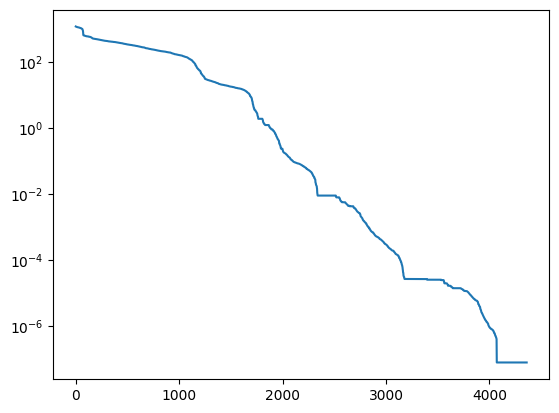

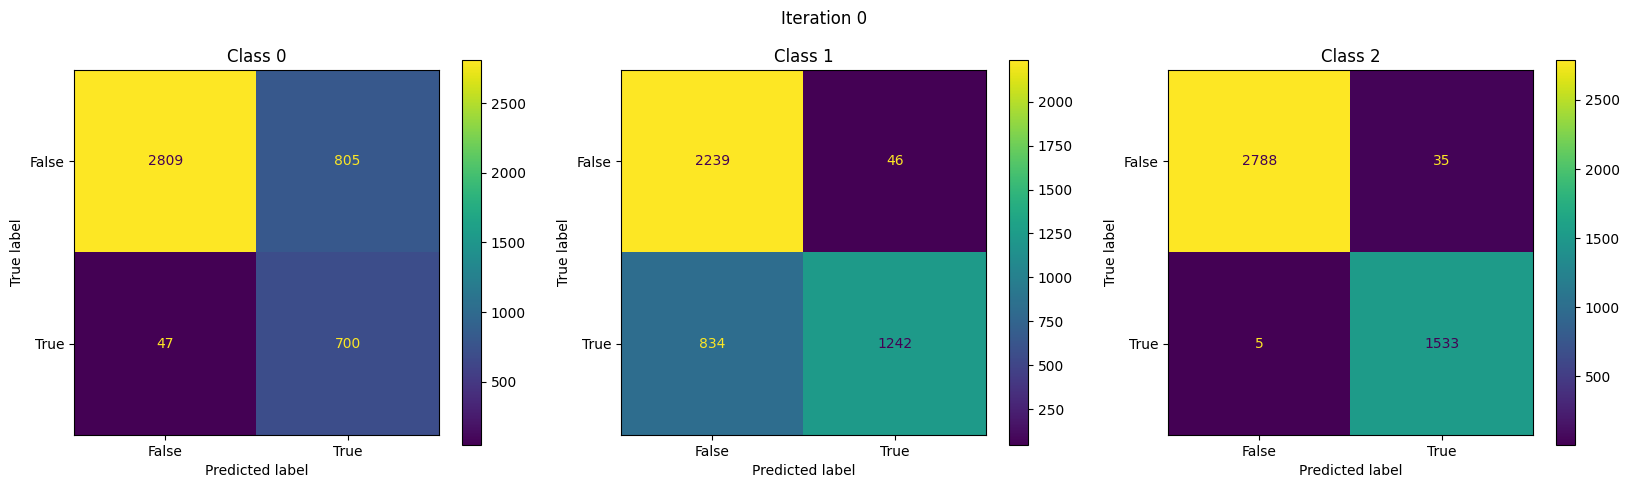

CNN Val accuracy trained on Lake Set for iteration 0:  88.38951587677002
CNN Val accuracy trained on Oracle for iteration 0:  92.50936508178711
Trained & Saved 6 models
Trained & Saved 6 models
Trained & Saved 6 models


100%|██████████| 100/100 [00:06<00:00, 14.93it/s]


Iteration 1
Labels of Lake Class 0: 549
Labels of Lake Class 1: 1874
Labels of Lake Class 2: 1338
Labels of Labelled Set 0: 15
Labels of Labelled Set 1: 15
Labels of Labelled Set 2: 15
Shape of Labeled Data: (45, 28, 28, 3)
Shape of Unlabeled Data: (3761, 28, 28, 3)
Accuracy on unlabelled images: 85.80164849773996
1 (3761, 3)
Num img per class = 200
Number of images getting transferred: 600
Accuracy of Pseudo-labelled img added to dataset: 99.66666666666667


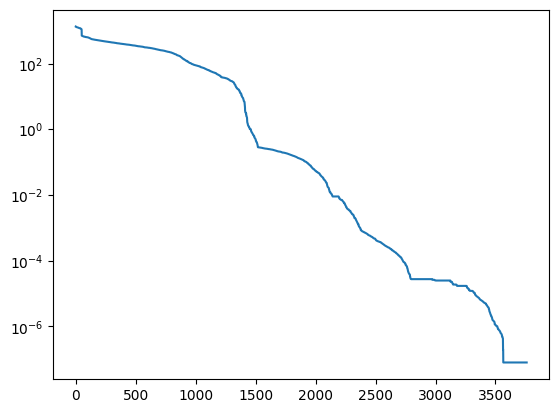

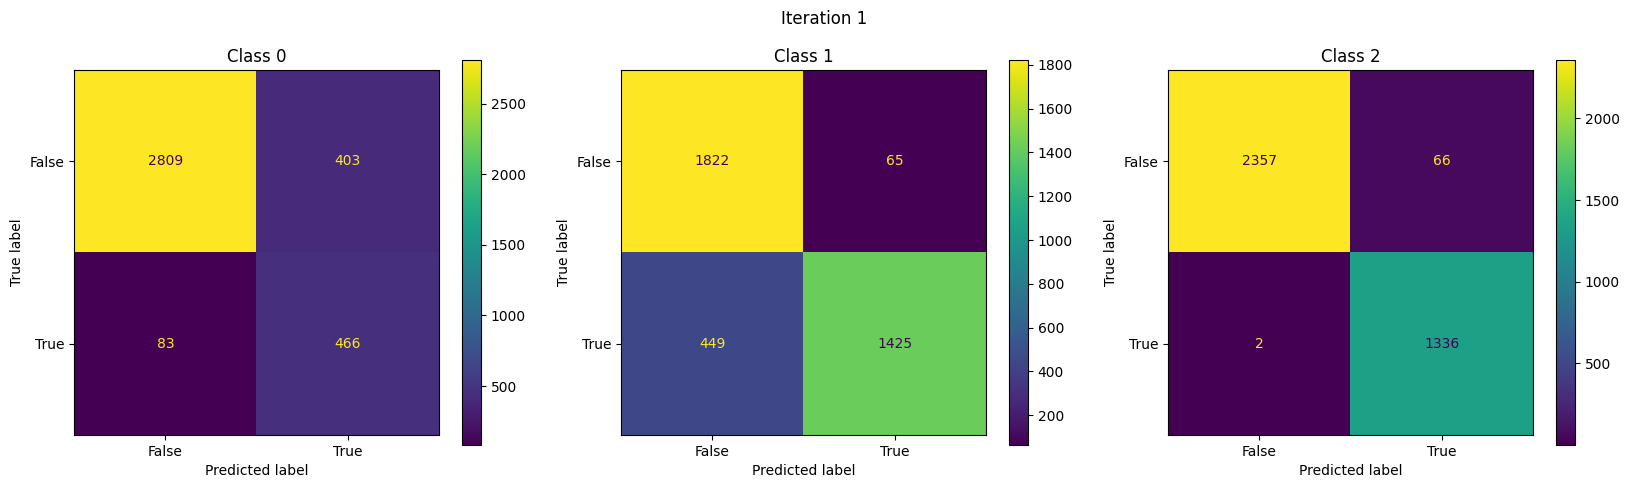

CNN Val accuracy trained on Lake Set for iteration 1:  84.26966071128845
CNN Val accuracy trained on Oracle for iteration 1:  91.38576984405518
Trained & Saved 6 models
Trained & Saved 6 models
Trained & Saved 6 models


100%|██████████| 100/100 [00:05<00:00, 17.94it/s]


Iteration 2
Labels of Lake Class 0: 351
Labels of Lake Class 1: 1672
Labels of Lake Class 2: 1138
Labels of Labelled Set 0: 15
Labels of Labelled Set 1: 15
Labels of Labelled Set 2: 15
Shape of Labeled Data: (45, 28, 28, 3)
Shape of Unlabeled Data: (3161, 28, 28, 3)
Accuracy on unlabelled images: 79.247073710851
2 (3161, 3)
Num img per class = 200
Number of images getting transferred: 600
Accuracy of Pseudo-labelled img added to dataset: 88.83333333333333


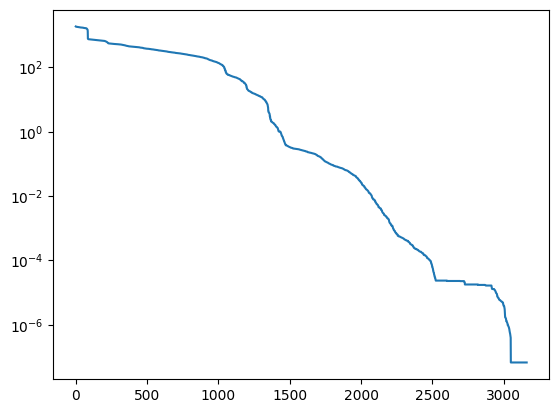

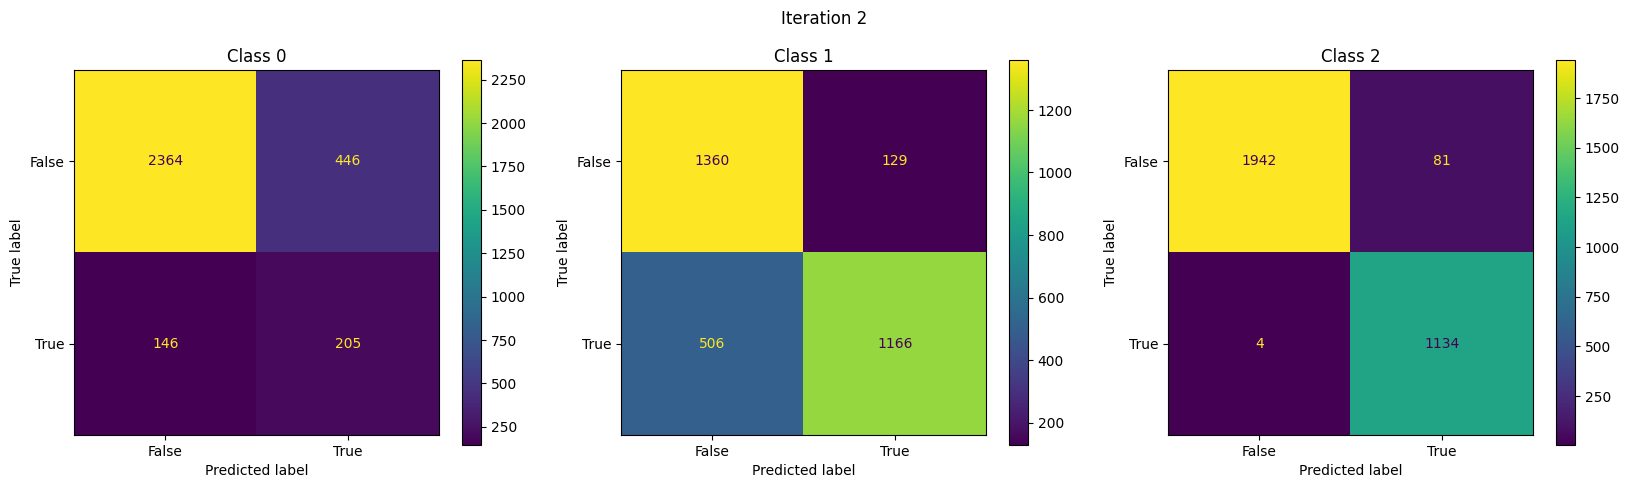

CNN Val accuracy trained on Lake Set for iteration 2:  95.13108730316162
CNN Val accuracy trained on Oracle for iteration 2:  96.6292142868042
Trained & Saved 6 models
Trained & Saved 6 models
Trained & Saved 6 models


100%|██████████| 100/100 [00:05<00:00, 19.22it/s]


Iteration 3
Labels of Lake Class 0: 216
Labels of Lake Class 1: 1407
Labels of Lake Class 2: 938
Labels of Labelled Set 0: 15
Labels of Labelled Set 1: 15
Labels of Labelled Set 2: 15
Shape of Labeled Data: (45, 28, 28, 3)
Shape of Unlabeled Data: (2561, 28, 28, 3)
Accuracy on unlabelled images: 68.80124951190942
3 (2561, 3)
Num img per class = 200
Number of images getting transferred: 600
Accuracy of Pseudo-labelled img added to dataset: 81.16666666666667


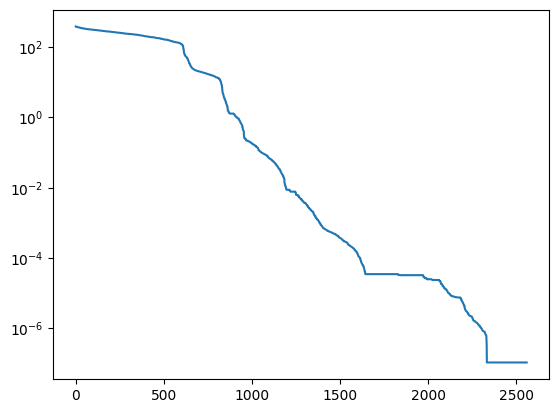

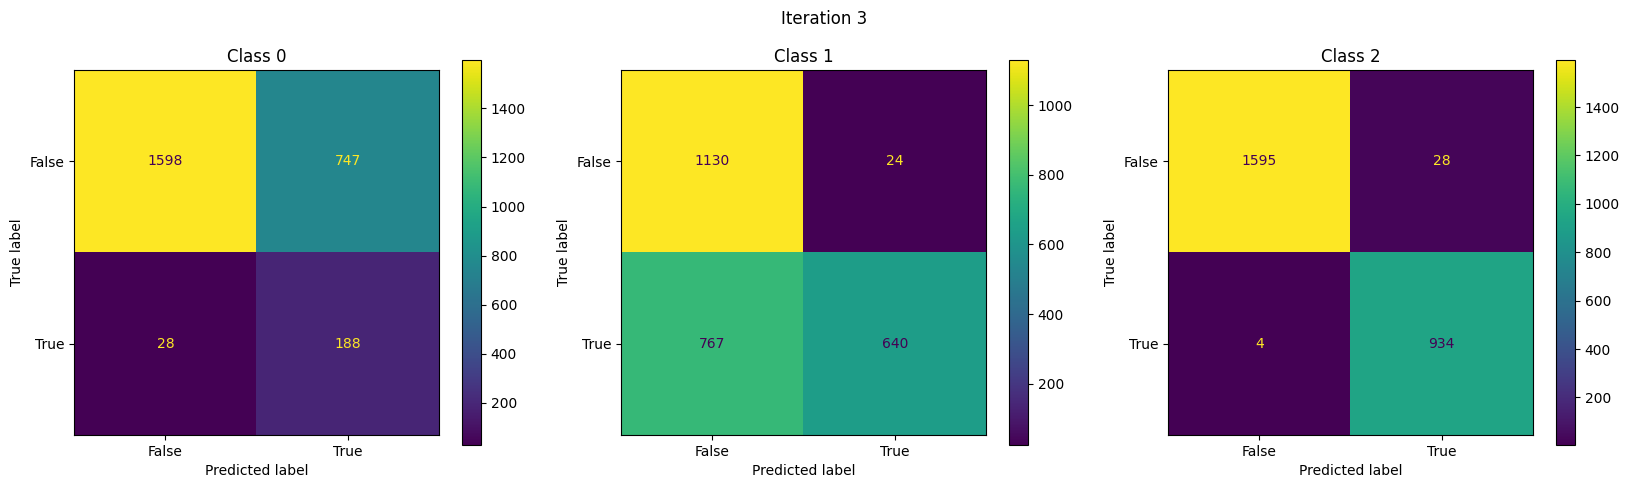

CNN Val accuracy trained on Lake Set for iteration 3:  83.14606547355652
CNN Val accuracy trained on Oracle for iteration 3:  97.37827777862549
Trained & Saved 6 models
Trained & Saved 6 models
Trained & Saved 6 models


100%|██████████| 100/100 [00:04<00:00, 22.74it/s]


Iteration 4
Labels of Lake Class 0: 127
Labels of Lake Class 1: 1096
Labels of Lake Class 2: 738
Labels of Labelled Set 0: 15
Labels of Labelled Set 1: 15
Labels of Labelled Set 2: 15
Shape of Labeled Data: (45, 28, 28, 3)
Shape of Unlabeled Data: (1961, 28, 28, 3)
Accuracy on unlabelled images: 73.83987761346252
4 (1961, 3)
Num img per class = 200
Number of images getting transferred: 600
Accuracy of Pseudo-labelled img added to dataset: 73.5


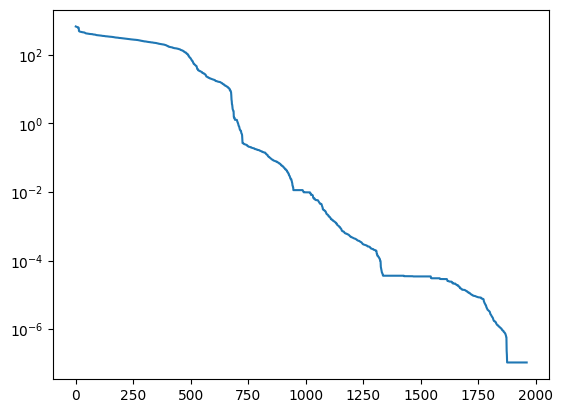

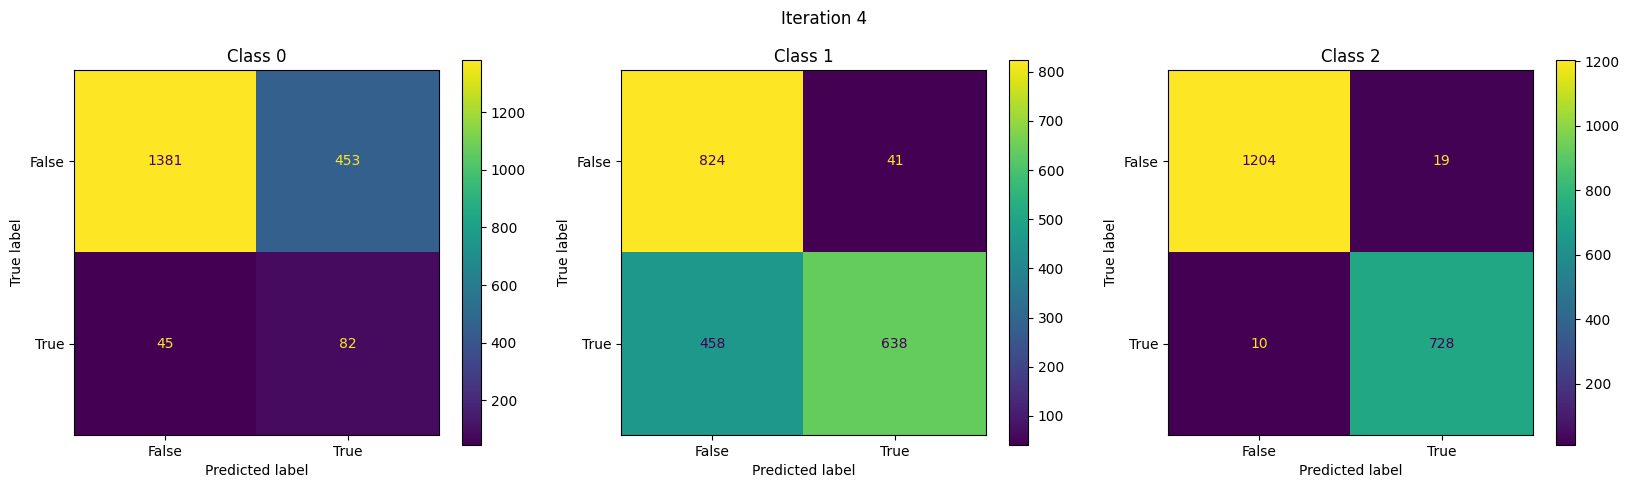

CNN Val accuracy trained on Lake Set for iteration 4:  82.39700198173523
CNN Val accuracy trained on Oracle for iteration 4:  97.75280952453613
Trained & Saved 6 models
Trained & Saved 6 models
Trained & Saved 6 models


100%|██████████| 100/100 [00:04<00:00, 24.90it/s]


Iteration 5
Labels of Lake Class 0: 78
Labels of Lake Class 1: 746
Labels of Lake Class 2: 537
Labels of Labelled Set 0: 15
Labels of Labelled Set 1: 15
Labels of Labelled Set 2: 15
Shape of Labeled Data: (45, 28, 28, 3)
Shape of Unlabeled Data: (1361, 28, 28, 3)
Accuracy on unlabelled images: 77.95738427626745
5 (1361, 3)
Num img per class = 200
Number of images getting transferred: 498
Accuracy of Pseudo-labelled img added to dataset: 86.74698795180723


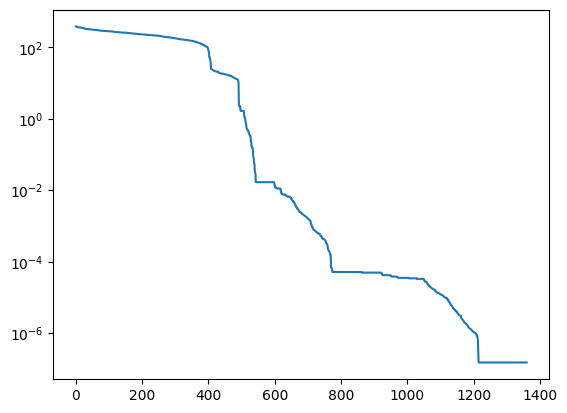

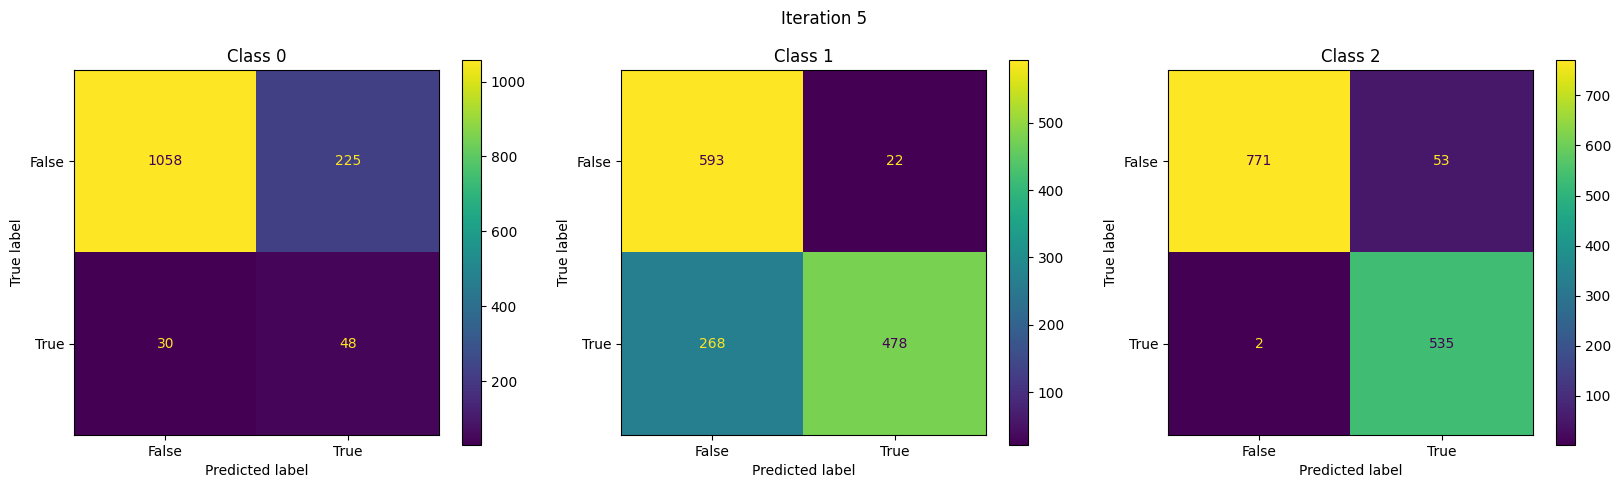

CNN Val accuracy trained on Lake Set for iteration 5:  88.38951587677002
CNN Val accuracy trained on Oracle for iteration 5:  98.50187301635742
Trained & Saved 6 models
Trained & Saved 6 models
Trained & Saved 6 models


100%|██████████| 100/100 [00:03<00:00, 26.67it/s]


Iteration 6
Labels of Lake Class 0: 38
Labels of Lake Class 1: 488
Labels of Lake Class 2: 337
Labels of Labelled Set 0: 15
Labels of Labelled Set 1: 15
Labels of Labelled Set 2: 15
Shape of Labeled Data: (45, 28, 28, 3)
Shape of Unlabeled Data: (863, 28, 28, 3)
Accuracy on unlabelled images: 70.33603707995366
6 (863, 3)
Num img per class = 200
Number of images getting transferred: 538
Accuracy of Pseudo-labelled img added to dataset: 77.69516728624535


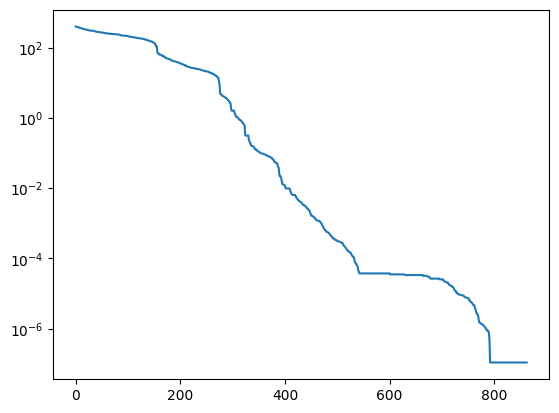

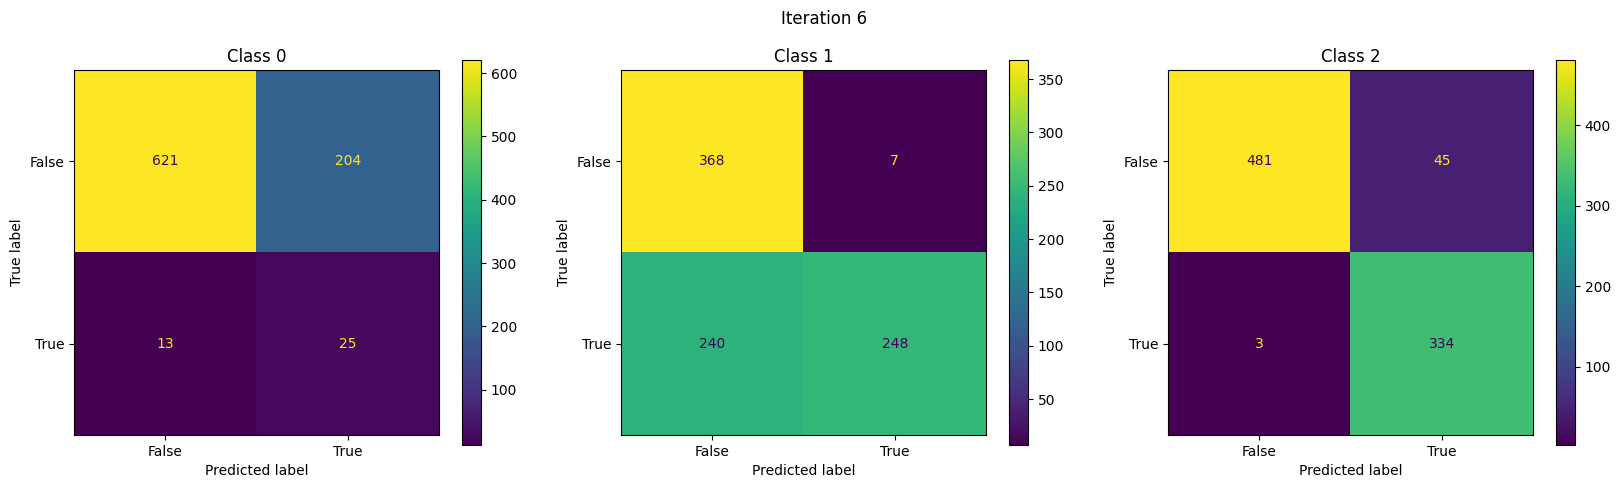

CNN Val accuracy trained on Lake Set for iteration 6:  81.64793848991394
CNN Val accuracy trained on Oracle for iteration 6:  97.75280952453613


In [33]:
#  img_per_class: num images added per loop per class
x,y,xu,yu,labeled_x,labeled_y,confidence_list, val_scores, oracle_val_scores, classwise_accuracies, pl_accuracies = cage_loop(LFS, max_iters=7, threshold=10**-5,  img_per_class = 200)

# Val 2

In [34]:
df = pd.DataFrame([val_scores,oracle_val_scores,pl_accuracies], columns=[f'Iteration {i}' for i in range(len(val_scores))], index=['Our Results','Oracle/Skyline','Pseudo Labelled'])

In [35]:
df

,Iteration 0,Iteration 1,Iteration 2,Iteration 3,Iteration 4,Iteration 5,Iteration 6
Our Results,88.389516,84.269661,95.131087,83.146065,82.397002,88.389516,81.647938
Oracle/Skyline,92.509365,91.385770,96.629214,97.378278,97.752810,98.501873,97.752810
Pseudo Labelled,99.666667,99.666667,88.833333,81.166667,73.500000,86.746988,77.695167


In [38]:
df2 = pd.DataFrame(classwise_accuracies, columns=[f'Class {i}' for i in range(3)], index=[f'Iteration {i}' for i in range(len(val_scores))])

In [39]:
df2

,Class 0,Class 1,Class 2
Iteration 0,80.463197,79.821142,99.082779
Iteration 1,87.077905,86.333422,98.191970
Iteration 2,81.271749,79.911420,97.310978
Iteration 3,69.738383,69.113627,98.750488
Iteration 4,74.604793,74.553799,98.521163
Iteration 5,81.263777,78.692138,95.958854
Iteration 6,74.855156,71.378911,94.438007


# Val 1

In [28]:
df = pd.DataFrame([val_scores,oracle_val_scores,pl_accuracies], columns=[f'Iteration {i}' for i in range(len(val_scores)-1)]+["Final"], index=['Our Results','Oracle/Skyline','Pseudo Labelled'])

In [29]:
df

,Iteration 0,Iteration 1,Iteration 2,Iteration 3,Iteration 4,Iteration 5,Iteration 6,Final
Our Results,85.767788,84.644192,76.779026,77.153558,76.779026,75.655431,80.898875,81.273407
Oracle/Skyline,95.880151,91.385770,95.505619,95.880151,92.883897,85.767788,80.524343,97.752810
Pseudo Labelled,98.500000,97.500000,90.500000,85.833333,73.500000,71.166667,86.177106,NaN


In [30]:
df2 = pd.DataFrame(classwise_accuracies, columns=[f'Class {i}' for i in range(3)], index=[f'Iteration {i}' for i in range(len(val_scores)-1)])

In [31]:
df2

,Class 0,Class 1,Class 2
Iteration 0,78.674616,78.032561,99.220362
Iteration 1,84.738102,84.392449,99.282106
Iteration 2,78.930718,77.538754,98.291680
Iteration 3,80.476376,78.641156,97.540023
Iteration 4,75.471698,73.278939,96.991331
Iteration 5,70.977223,68.846436,96.987509
Iteration 6,85.939553,84.756899,97.503285
